<a href="https://colab.research.google.com/github/lauroPereira/data-wrangling-lessons/blob/master/data_wrangling_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports

In [1]:
#data wrangling
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns

#Enriquecimento (Feature Engineering)

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Criando colunas novas com base nas existentes

In [3]:
df['tip_normalize'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_normalize
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## case usando dataset titanic

In [4]:
# df2 = sns.load_dataset('titanic')
df2 = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2['personal_title'] = df2.Name.str.extract('.+?, (.+?)\.', expand=False)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Usando análise gráfica para selecionar features

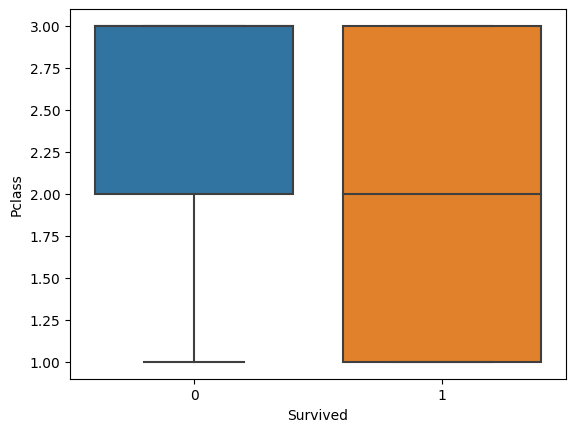

In [6]:
sns.boxplot(data=df2, x='Survived', y='Pclass');

---
> Observamos que existe uma quantidade muito maior de mortos das classes 2 e 3 do que da classe 1.

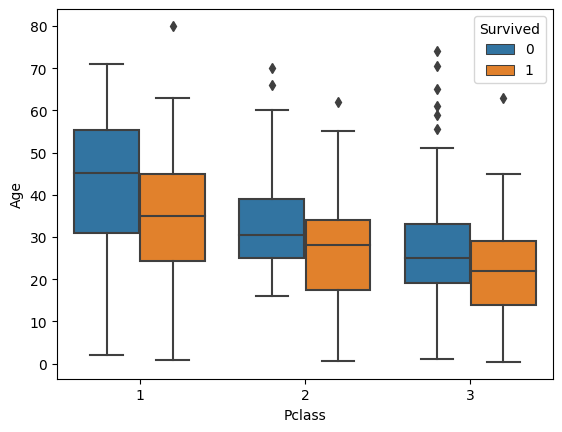

In [7]:
sns.boxplot(data=df2, x='Pclass', y='Age', hue='Survived');

---
> Olhando para a distribuição das idades dentro de cada classe vemos que existe uma tendencia dos mais velhos não terem sobrevivido, e este padrão se sobressalta na classe 1.

# Usando matriz de correlação para selecionar features

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  personal_title  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


<ipython-input-9-71c6abeb6672>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap='Greens_r')


<Axes: >

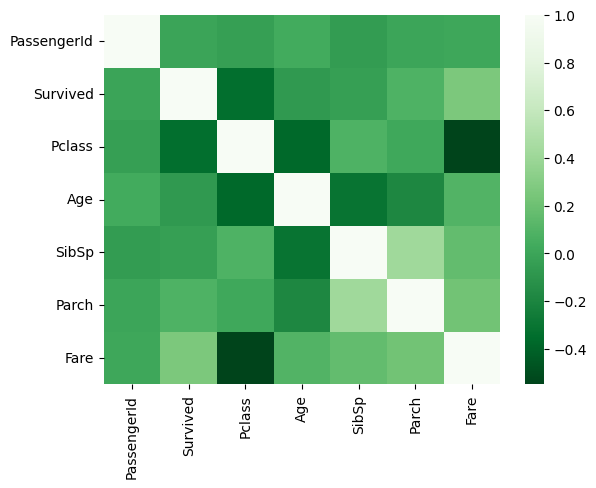

In [9]:
sns.heatmap(df2.corr(), cmap='Greens_r')

# Usando Scikit-learn para selecionar as features

In [10]:
# Criando indice
df2 = df2.set_index('PassengerId')
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss


In [11]:
# Criando modelo
df_model = df2.drop(columns=['Name', 'Ticket', 'Cabin']).dropna()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [23]:
# selecionando variável target e features
target = df_model['Survived']
df_features = df_model.drop(columns='Survived')

In [13]:
# selecionando features categóricas
cat_features = df_model.select_dtypes(exclude='number').columns

cat_features

Index(['Sex', 'Embarked', 'personal_title'], dtype='object')

In [20]:
# realizando encoding
encoder = OrdinalEncoder()
df_model[cat_features]= encoder.fit_transform(df_model[cat_features]).astype(int)
df_model

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,11
2,1,1,0,38.0,1,0,71.2833,0,12
3,1,3,0,26.0,0,0,7.9250,2,8
4,1,1,0,35.0,1,0,53.1000,2,12
5,0,3,1,35.0,0,0,8.0500,2,11
...,...,...,...,...,...,...,...,...,...
886,0,3,0,39.0,0,5,29.1250,1,12
887,0,2,1,27.0,0,0,13.0000,2,14
888,1,1,0,19.0,0,0,30.0000,2,8


# Testando correlação não linear com Scikit learn

In [25]:
discrete_features= df_features.dtypes==int
discrete_features

Pclass             True
Sex                True
Age               False
SibSp              True
Parch              True
Fare              False
Embarked           True
personal_title     True
dtype: bool

In [27]:
scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_features)

<Axes: >

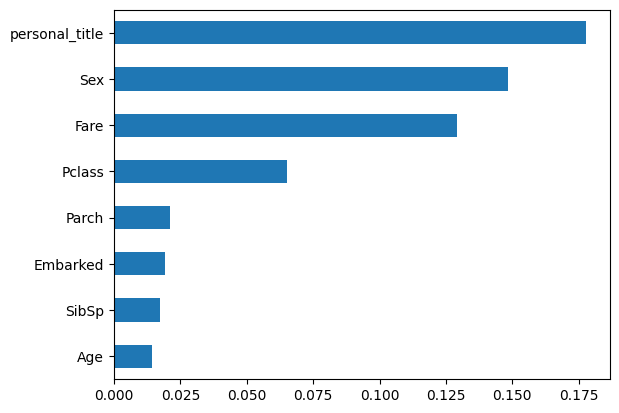

In [32]:
pd.Series(
    data=scores,
    index=df_features.columns
).sort_values().plot.barh()